# Plots with much less noise

_17 August 2021_ <br />
_Chuan-Zheng Lee <czlee@stanford.edu>_ <br />
_Rough working_

This also includes plots from `parameter-scheduling.ipynb` that can be updated with more samples/iterations.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

from plots_utils import plot_averaged_training_charts, plot_comparison, make_axes, show_timestamp_info

In [2]:
def get_comparison_specs(clients=20, noise='__all__'):

    common_fixed_specs = {
        'rounds': 150,
        'batch_size': 64,
        'epochs': 1,
        'ema_coefficient': 1 / 3,
        'data_per_client': None,
        'save_squared_error': False,
        'send': 'deltas',
    }

    fixed_specs = common_fixed_specs.copy()
    fixed_specs.update({
        'power_update_period': 1,
        'power_quantile': 0.9,
        'power_factor': 0.9,
    })
    title_specs = {
        'power': 1.0,
        'clients': clients,
        'dataset': 'fashion-mnist',
        'lr_client': 0.01,
        'momentum_client': 0.0,
    }
    series_specs = {
        'noise': noise,
    }

    all_analog_specs = title_specs, fixed_specs, series_specs

    fixed_specs = common_fixed_specs.copy()
    fixed_specs.update({
        'qrange_update_period': 1,
        'qrange_param_quantile': 0.9,
        'qrange_client_quantile': 0.9,
        'channel_uses': None,
        'rounding_method': 'stochastic',
        'parameter_schedule': 'staggered',
        'zero_bits_strategy': 'read-zero',
    })

    all_digital_specs = title_specs, fixed_specs, series_specs
    
    return all_analog_specs, all_digital_specs

def _plot_comparisons(field, paths, all_specs, right_ylim=None, **kwargs):
    if right_ylim is None:
        right_ylim = default_right_ylim
    
    axs = make_axes(2, axsize=(11, 7))
    plot_comparison(field, *paths, *all_specs, plot_confints=True, ax=axs[0], **kwargs)
    axs[0].grid()
    plot_comparison(field, *paths, *all_specs, plot_confints=True, ax=axs[1], **kwargs)
    axs[1].set_ylim(right_ylim)
    axs[1].grid()

def plot_analog_vs_digital(paths, clients, noise='__all__', field='accuracy', right_ylim=None, **kwargs):
    all_specs = get_comparison_specs(clients, noise)
    _plot_comparisons(field, paths, all_specs, right_ylim=right_ylim, **kwargs)

def plot_analog_vs_digital_with_old_data(paths, clients, noise='__all__', field='accuracy', right_ylim=None, **kwargs):
    all_specs = get_comparison_specs(clients, noise)

    # apply some modifications to account for old arguments
    del all_specs[1][1]['parameter_schedule']
    new_digital_title_specs = all_specs[1][0].copy()
    new_digital_title_specs['parameter_schedule'] = 'staggered'
    new_digital_specs = new_digital_title_specs, all_specs[1][1], all_specs[1][2]
    new_digital_specs[1]['save_squared_error'] = [False, '__missing__']
    all_specs[0][1]['save_squared_error'] = [False, '__missing__']
    all_specs = all_specs[0], new_digital_specs

    _plot_comparisons(field, paths, all_specs, right_ylim=right_ylim, **kwargs)

# Fashion-MNIST

In [3]:
default_right_ylim = (0.5, 0.75)

## Only old data

In [4]:
analog_path = [
    Path("results/20210724-other-datasets-dynpower/"),
    Path("results/20210725-other-datasets-dynpower/"),
    Path("results/20210801-dynpower-cifarfmnist"),
]
digital_path = [
    Path("results/20210729-paramsched-cifarfmnist/"),
    Path("results/20210730-paramsched-cifarfmnist/"),
    Path("results/20210801-staggered-dynquant-cifarfmnist/"),
    Path("results/20210808-staggered-dynquant-cifarfmnist/"),
]
paths = analog_path, digital_path
show_timestamp_info(digital_path)

| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **29 Jul 2021, 08:04:59** | 29 Jul 2021, 08:27:42 | 22 min 43 s |
| last to finish | 08 Aug 2021, 11:04:31 | **08 Aug 2021, 11:25:31** | 21 min 00 s |
| shortest | 29 Jul 2021, 13:37:40 | 29 Jul 2021, 13:58:26 | **20 min 46 s** |
| longest | 31 Jul 2021, 20:13:25 | 31 Jul 2021, 20:54:54 | **41 min 28 s** |


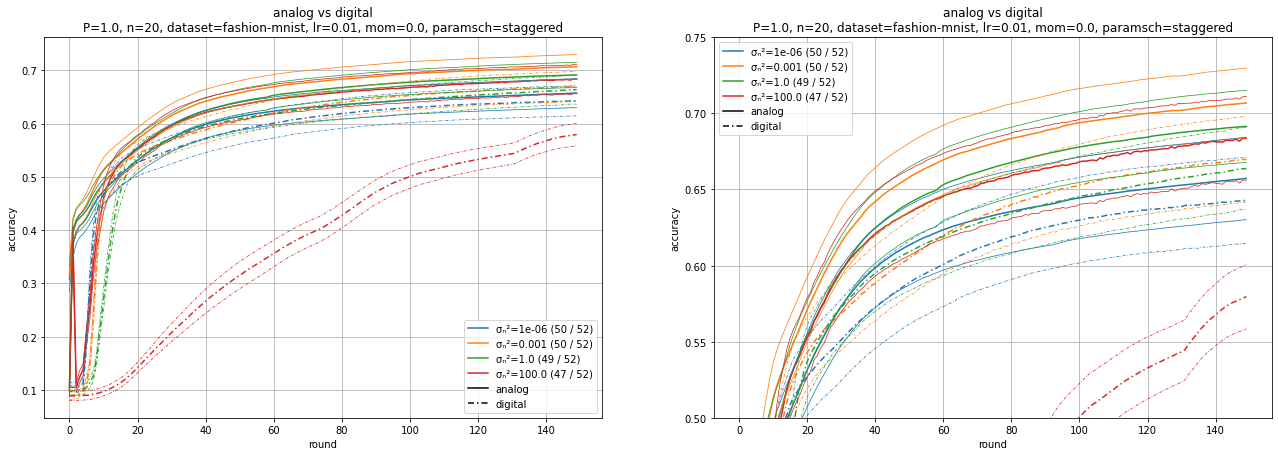

In [5]:
plot_analog_vs_digital_with_old_data(paths, clients=20)

## Both old and new data

In [6]:
analog_path = [
    Path("results/20210724-other-datasets-dynpower/"),
    Path("results/20210725-other-datasets-dynpower/"),
    Path("results/20210801-dynpower-cifarfmnist"),
    Path("results/20210813-fmnist-dynpower"),
]
digital_path = [
    Path("results/20210729-paramsched-cifarfmnist/"),
    Path("results/20210730-paramsched-cifarfmnist/"),
    Path("results/20210801-staggered-dynquant-cifarfmnist/"),
    Path("results/20210808-staggered-dynquant-cifarfmnist/"),
    Path("results/20210813-fmnist-dynquant"),
]
paths = analog_path, digital_path
show_timestamp_info(digital_path)

| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **29 Jul 2021, 08:04:59** | 29 Jul 2021, 08:27:42 | 22 min 43 s |
| last to finish | 16 Aug 2021, 16:02:10 | **16 Aug 2021, 16:24:10** | 21 min 59 s |
| shortest | 15 Aug 2021, 04:46:33 | 15 Aug 2021, 05:06:20 | **19 min 47 s** |
| longest | 31 Jul 2021, 20:13:25 | 31 Jul 2021, 20:54:54 | **41 min 28 s** |


/home/czlee/kyanite/plots_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data[series][field][directory] = training[field]
/home/czlee/kyanite/plots_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data[series][field][directory] = training[field]


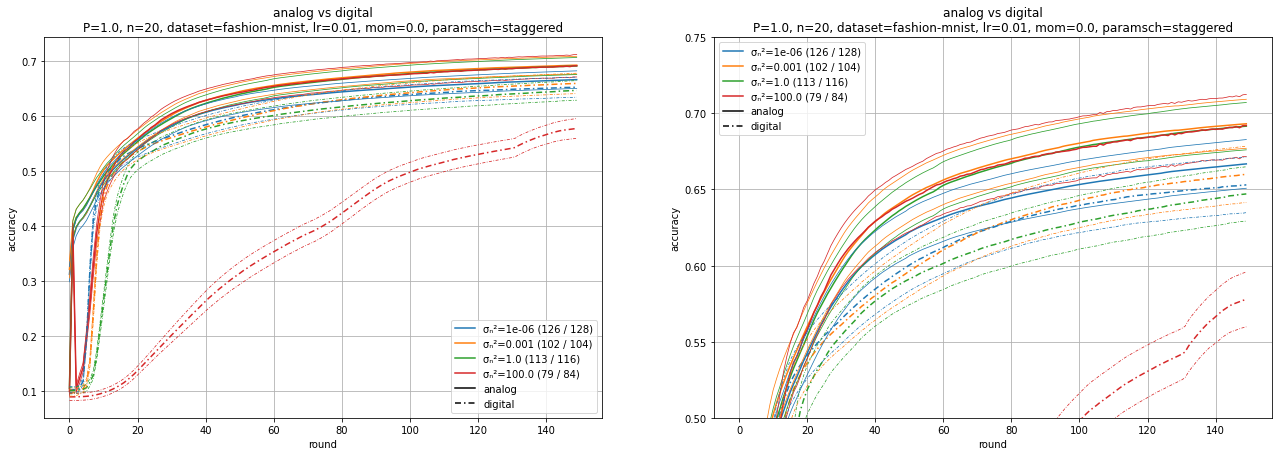

In [7]:
plot_analog_vs_digital_with_old_data(paths, clients=20, noise=[1e-6, 1e-3, 1.0, 100.0])

Maybe it's overfitting?

/home/czlee/kyanite/plots_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data[series][field][directory] = training[field]
/home/czlee/kyanite/plots_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data[series][field][directory] = training[field]


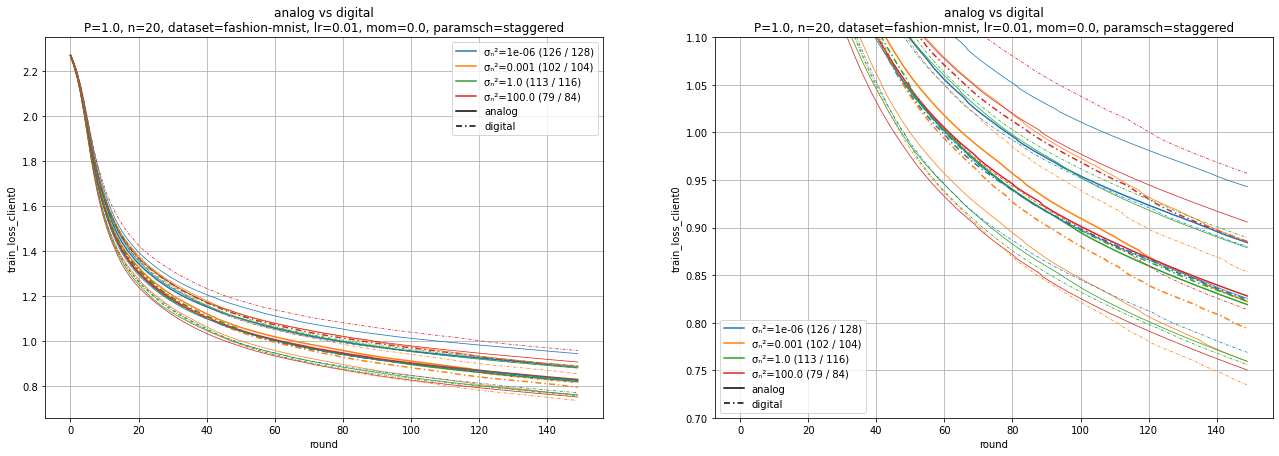

In [8]:
plot_analog_vs_digital_with_old_data(paths, clients=20, noise=[1e-6, 1e-3, 1.0, 100.0], field='train_loss_client0', right_ylim=(0.7, 1.1))

Nope, the high SNR is training worse too.

## Only new data

In [9]:
analog_path = [
    Path("results/20210813-fmnist-dynpower"),
]
digital_path = [
    Path("results/20210813-fmnist-dynquant"),
]
paths = analog_path, digital_path
show_timestamp_info(digital_path)

| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **13 Aug 2021, 03:57:59** | 13 Aug 2021, 04:27:49 | 29 min 49 s |
| last to finish | 16 Aug 2021, 16:02:10 | **16 Aug 2021, 16:24:10** | 21 min 59 s |
| shortest | 15 Aug 2021, 04:46:33 | 15 Aug 2021, 05:06:20 | **19 min 47 s** |
| longest | 16 Aug 2021, 04:12:44 | 16 Aug 2021, 04:45:56 | **33 min 11 s** |


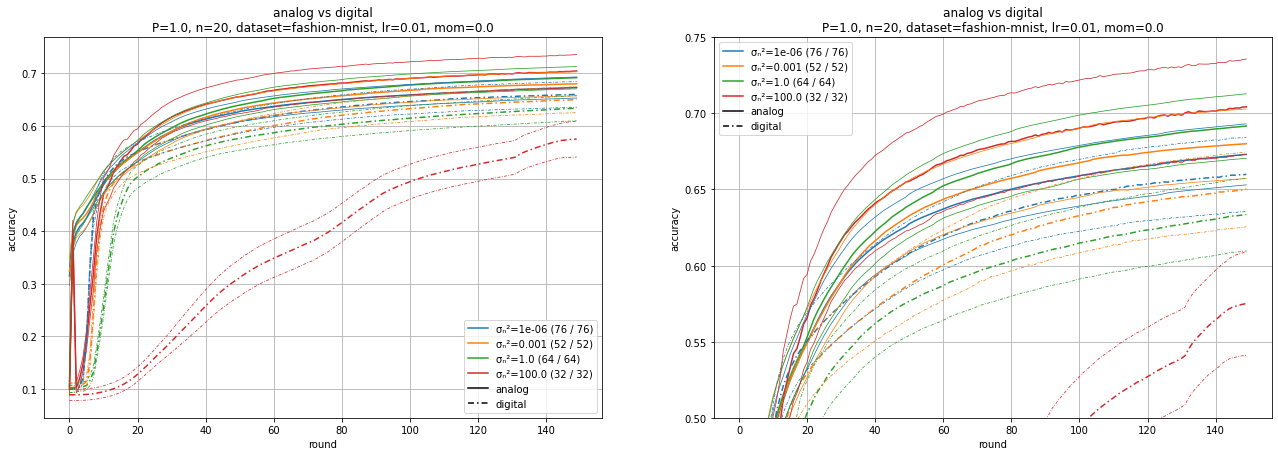

In [10]:
plot_analog_vs_digital(paths, clients=20, noise=[1e-6, 1e-3, 1.0, 100.0])

Comparing this to the plot in the above sections, I still think this indicates that there's too much variance, and most of the lines above are statistical ties.

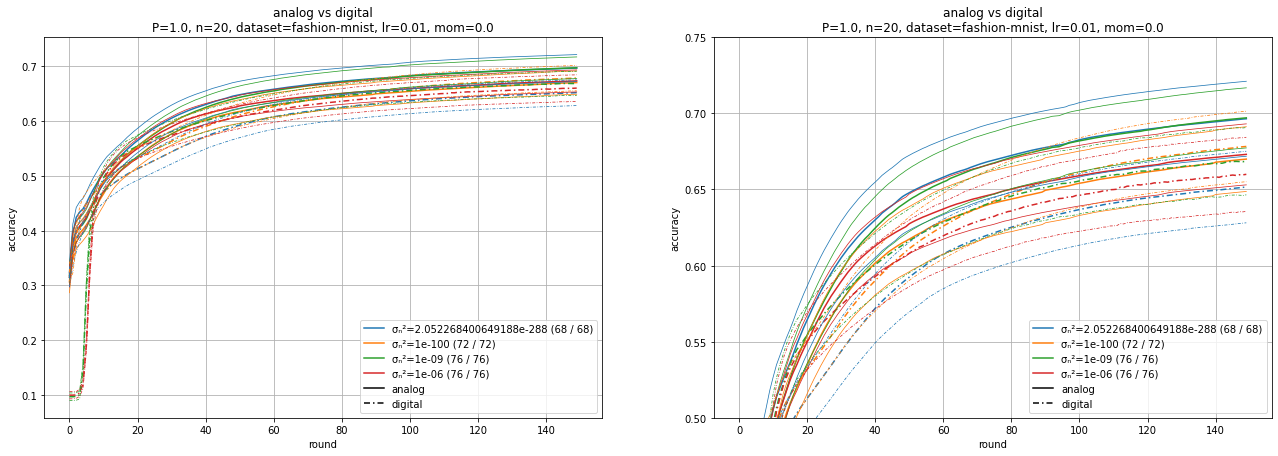

In [11]:
plot_analog_vs_digital(paths, clients=20, noise=[2.052268400649188e-288, 1e-100, 1e-9, 1e-6])

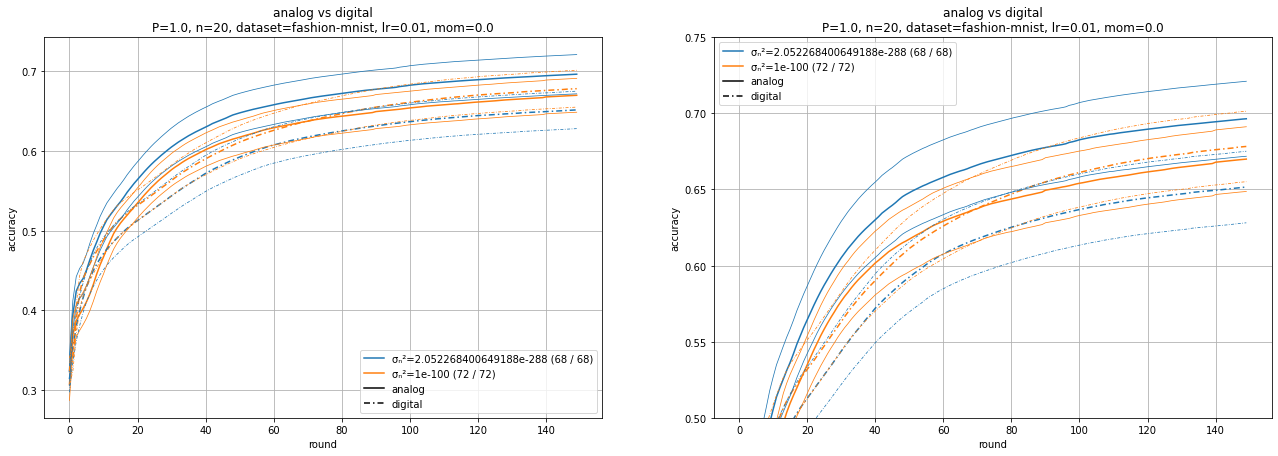

In [12]:
plot_analog_vs_digital(paths, clients=20, noise=[2.052268400649188e-288, 1e-100])

One of the things that's weird about this result is that if you actually generate normal samples using
```
>>> torch.normal(0.0, 1e-100, size=(20,))
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
```
you will just get a vector of zeros, not approximately zero, but exactly zero. The same of course goes for
```
>>> torch.normal(0.0, 2.052268400649188e-288, size=(20,))
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
```
so while it makes sense that there would be a digital difference in the above plots, the analog plots are basically the same experiment.

# Accidental plots with $n = 17$ and $n = 34$

These are results of experiments where I used the wrong arguments (I changed `-n` when I meant to change `-q`). Since the results are there, may as well look at them to see what they show.

In [13]:
analog_path = [
    Path("results/20210815-accident-dynpower/"),
]
digital_path = [
    Path("results/20210815-accident-dynquant/"),
]
paths = analog_path, digital_path

In [14]:
show_timestamp_info(analog_path)

| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **15 Aug 2021, 05:33:05** | 15 Aug 2021, 06:01:30 | 28 min 25 s |
| last to finish | 15 Aug 2021, 13:12:02 | **15 Aug 2021, 13:40:46** | 28 min 43 s |
| shortest | 15 Aug 2021, 06:57:23 | 15 Aug 2021, 07:25:26 | **28 min 02 s** |
| longest | 15 Aug 2021, 11:17:07 | 15 Aug 2021, 11:45:53 | **28 min 46 s** |


In [15]:
show_timestamp_info(digital_path)

| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **15 Aug 2021, 05:33:05** | 15 Aug 2021, 06:03:37 | 30 min 32 s |
| last to finish | 15 Aug 2021, 13:07:48 | **15 Aug 2021, 13:37:46** | 29 min 57 s |
| shortest | 15 Aug 2021, 13:06:15 | 15 Aug 2021, 13:36:05 | **29 min 50 s** |
| longest | 15 Aug 2021, 12:59:01 | 15 Aug 2021, 13:30:58 | **31 min 56 s** |


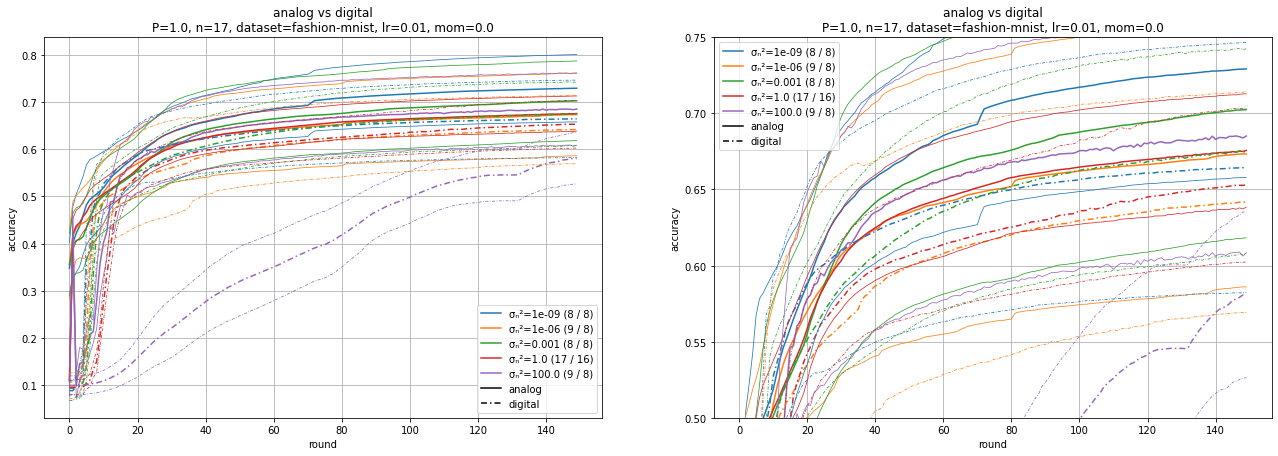

In [16]:
plot_analog_vs_digital(paths, clients=17)

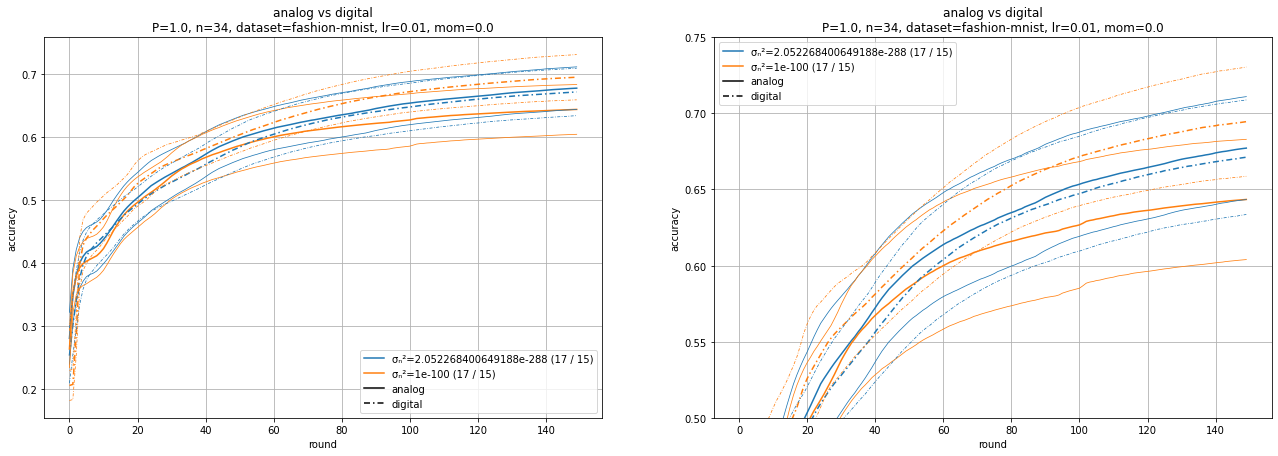

In [17]:
plot_analog_vs_digital(paths, clients=34)

Comparing this to the $n = 20$ plot pretty much flips the result, so it's probably a statistical tie.

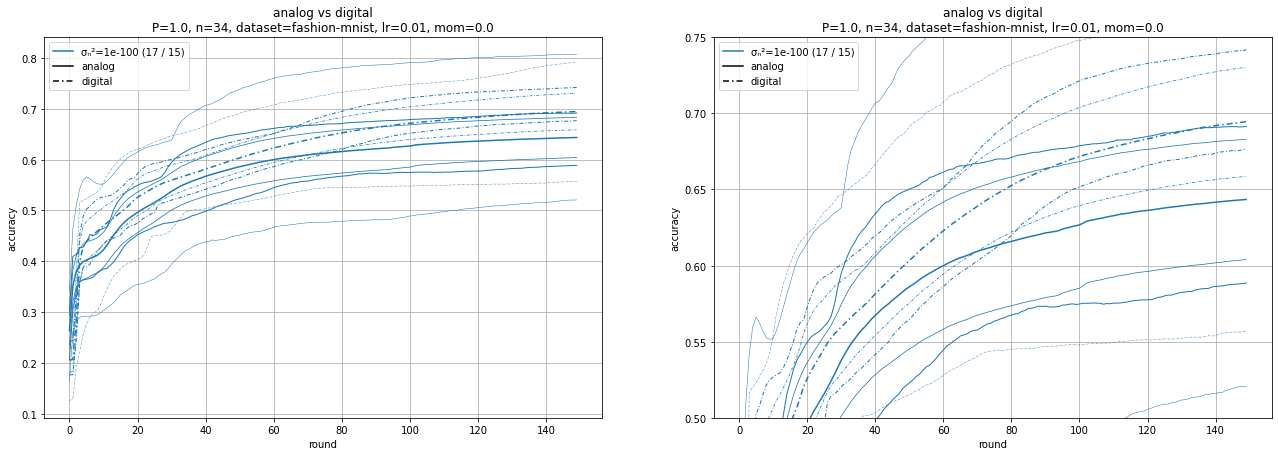

In [18]:
plot_analog_vs_digital(paths, 34, noise=[1e-100], plot_range=True, plot_quartiles=True)

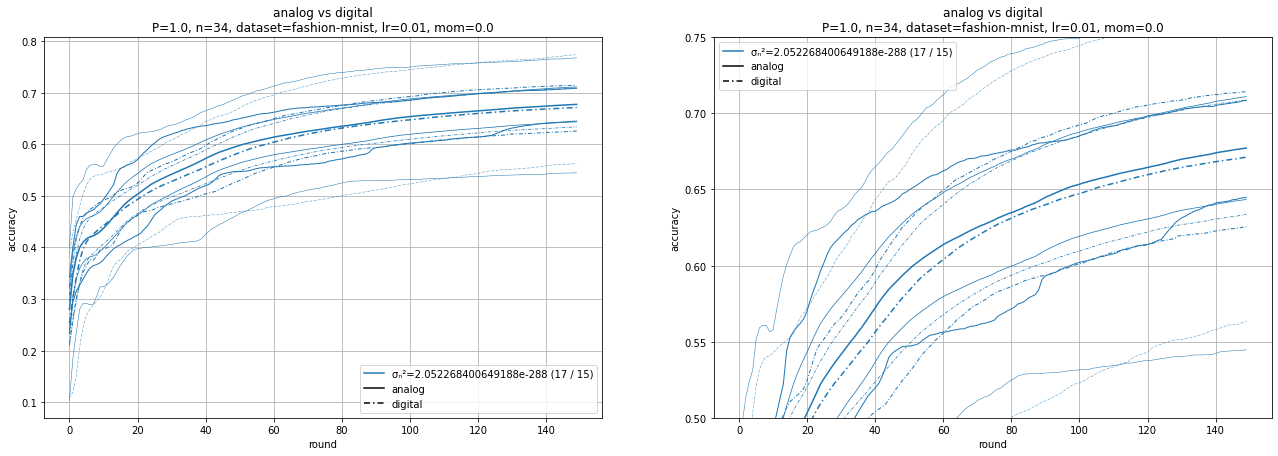

In [19]:
plot_analog_vs_digital(paths, 34, noise=[2.052268400649188e-288], plot_range=True, plot_quartiles=True)

# CIFAR-10 with the wrong learning rate and momentum

I forgot to set the learning rate and momentum arguments for these, so they use the default values of 0.01 and 0.0.

In [20]:
def get_comparison_specs(clients=20, noise='__all__'):

    common_fixed_specs = {
        'rounds': 150,
        'batch_size': 64,
        'epochs': 1,
        'ema_coefficient': 1 / 3,
        'data_per_client': None,
        'save_squared_error': False,
        'send': 'deltas',
    }

    fixed_specs = common_fixed_specs.copy()
    fixed_specs.update({
        'power_update_period': 1,
        'power_quantile': 0.9,
        'power_factor': 0.9,
    })
    title_specs = {
        'power': 1.0,
        'clients': clients,
        'dataset': 'cifar10',
        'lr_client': 0.01,
        'momentum_client': 0.0,
    }
    series_specs = {
        'noise': noise,
    }

    all_analog_specs = title_specs, fixed_specs, series_specs

    fixed_specs = common_fixed_specs.copy()
    fixed_specs.update({
        'qrange_update_period': 1,
        'qrange_param_quantile': 0.9,
        'qrange_client_quantile': 0.9,
        'channel_uses': None,
        'rounding_method': 'stochastic',
        'parameter_schedule': 'staggered',
        'zero_bits_strategy': 'read-zero',
    })

    all_digital_specs = title_specs, fixed_specs, series_specs
    
    return all_analog_specs, all_digital_specs

In [21]:
default_right_ylim = (0.37, 0.45)

In [22]:
analog_path = [
    Path("results/20210816-cifar10-dynpower-popeye1/"),
    Path("results/20210816-cifar10-dynpower-popeye2/"),
]
digital_path = [
    Path("results/20210816-cifar10-dynquant-popeye1/"),
    Path("results/20210816-cifar10-dynquant-popeye2/"),
]
paths = analog_path, digital_path
show_timestamp_info(digital_path)

| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **16 Aug 2021, 15:56:51** | 16 Aug 2021, 16:34:27 | 37 min 35 s |
| last to finish | 17 Aug 2021, 13:22:04 | **17 Aug 2021, 14:06:09** | 44 min 05 s |
| shortest | 16 Aug 2021, 18:28:39 | 16 Aug 2021, 19:06:13 | **37 min 34 s** |
| longest | 16 Aug 2021, 20:49:08 | 16 Aug 2021, 21:37:39 | **48 min 30 s** |


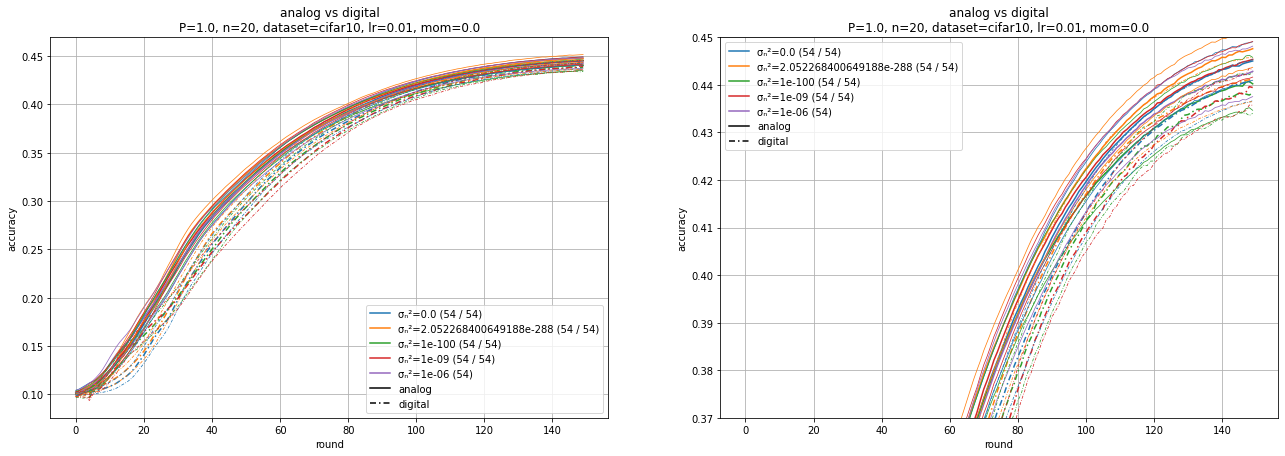

In [23]:
plot_analog_vs_digital(paths, clients=20)

We couldn't compare these to original plots or anything, but at first glance it does seem like the issues with statistical noise aren't so much of an issue here. 